# Gradient Descent - Lab

## Introduction

In this lab, you'll continue to formalize your knowledge of gradient descent by coding the algorithm yourself. In the upcoming labs, you'll apply similar procedures to implement logistic regression on your own.

## Objectives
You will be able to:
* Create a full gradient descent algorithm

## Using Gradient Descent to Minimize OLS

In order to practice gradient descent, you'll investigate a simple regression case in which you're looking to minimize the Residual Sum of Squares (RSS) between the predictions and the actual values. Remember that this is referred to Ordinary Least Squares (OLS) regression. Below, is a mock dataset that to work with. Preview the dataset. Then, you'll compare two simplistic models. From there, you'll use gradient descent to improve upon these  initial models.

## Loading the Dataset

In [1]:
#The dataset
import pandas as pd
df = pd.read_excel('movie_data.xlsx')
df.head()

,budget,domgross,title
0,13000000,25682380,21 &amp; Over
1,45658735,13414714,Dredd 3D
2,20000000,53107035,12 Years a Slave
3,61000000,75612460,2 Guns
4,40000000,95020213,42


## Two Simplistic Models

Imagine someone is attempting to predict the domestic gross sales of a movie based on the movie's budget, or at least further investigate how these two quantities are related. Two models are suggested, and need to be compared.  
The two models are:  
$\text{domgross} = 1.575 \cdot \text{budget}$  
$\text{domgross} = 1.331 \cdot \text{budget}$  
Here's a graph of the two models along with the actual data:

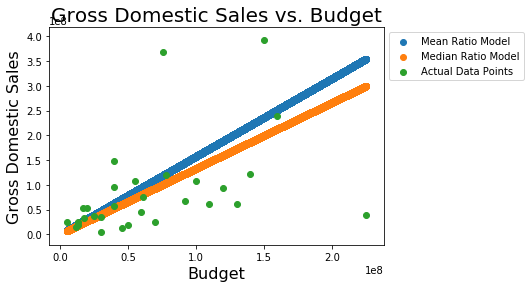

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(start=df.budget.min(), stop=df.budget.max(), num=10**5)
plt.scatter(x, 1.575*x, label='Mean Ratio Model') #Model 1
plt.scatter(x, 1.331*x, label='Median Ratio Model') #Model 2
plt.scatter(df.budget, df.domgross, label='Actual Data Points')
plt.title('Gross Domestic Sales vs. Budget', fontsize=20)
plt.xlabel('Budget', fontsize=16)
plt.ylabel('Gross Domestic Sales', fontsize=16)
plt.legend(bbox_to_anchor=(1,1))

## Error/Loss Functions

In order to compare the two models (and future ones), a metric for evaluating and comparing models to each other is needed. Traditionally this is the residual sum of squares. As such you are looking to minimize  $ \sum(\hat{y}-y)^2$.
Write a function **rss(m)** which calculates the residual sum of squares for a simplistic model $\text{domgross} = m \cdot \text{budget}$.

In [40]:
def rss(m, X=df.budget, y=df.domgross):
    #Your code here
    return sum((y - m*X)**2)

## Run your RSS function on the two models
Which of the two models is better?

In [41]:
#Your code here
rss(m=1.575)

2.7614512142376128e+17

In [42]:
rss(m=1.331)

2.3547212057814554e+17

In [6]:
#Your response here
# m = 1.331 is better because the RSS is smaller

## Gradient Descent

Now that you have a loss function, you can use numerical methods to find a minimum to the loss function. By minimizing the loss function, you have achieved an optimal solution according to the problem formulation. Here's the outline of gradient descent from the previous lesson:  

1. Define initial parameters:
    1. pick a starting point
    2. pick a step size $\alpha$ (alpha)
    3. choose a maximum number of iterations; the algorithm will terminate after this many iterations if a minimum has yet to be found
    4. (optionally) define a precision parameter; similar to the maximum number of iterations, this will terminate the algorithm early. For example, one might define a precision parameter of 0.00001, in which case if the change in the loss function were less then 0.00001, the algorithm would terminate. The idea is that we are very close to the bottom and further iterations would make a negligible difference.
2. Calculate the gradient at the current point (initially, the starting point)
3. Take a step (of size alpha) in the direction of the gradient
4. Repeat steps 2 and 3 until the maximum number of iterations is met, or the difference between two points is less then your precision parameter  

To start, visualize the cost function. Plot the cost function output for a range of m values from -3 to 5.

In [43]:
X = df.budget
y = df.domgross

Text(0.5, 1.0, 'RSS Loss Function for Various Values of m')

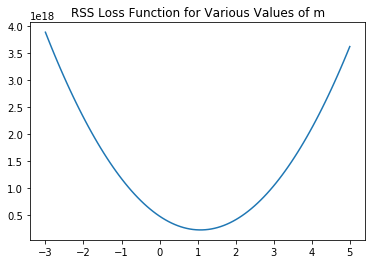

In [44]:
m = np.linspace(start=-3, stop=5, num=100)
rss_vals = [rss(m_val) for m_val in m]
plt.plot(m, rss_vals)
plt.title('RSS Loss Function for Various Values of m')

In [95]:
#Your code here
m_old = 1.5
m_old2 = 1.5
alpha = .02
step_size = .001
num_iterations = 100

for n in range(num_iterations):
    print('current m: ', m_old, '   RSS: ' , rss(m_old))
    rss_slope = 1 if (rss(m_old+step_size/2) - rss(m_old-step_size/2)) > 0 else -1
    m_new = m_old - alpha*rss_slope
    
    if m_old2 == m_new:
        break;
    m_old2 = m_old
    m_old = m_new
    
print(m_new)

current m:  1.5    RSS:  2.6084668957174006e+17
current m:  1.48    RSS:  2.5718630468768982e+17
current m:  1.46    RSS:  2.5370242377970506e+17
current m:  1.44    RSS:  2.503950468477857e+17
current m:  1.42    RSS:  2.4726417389193187e+17
current m:  1.4    RSS:  2.443098049121434e+17
current m:  1.38    RSS:  2.4153193990842038e+17
current m:  1.3599999999999999    RSS:  2.3893057888076278e+17
current m:  1.3399999999999999    RSS:  2.365057218291706e+17
current m:  1.3199999999999998    RSS:  2.3425736875364387e+17
current m:  1.2999999999999998    RSS:  2.3218551965418262e+17
current m:  1.2799999999999998    RSS:  2.3029017453078678e+17
current m:  1.2599999999999998    RSS:  2.2857133338345642e+17
current m:  1.2399999999999998    RSS:  2.2702899621219146e+17
current m:  1.2199999999999998    RSS:  2.2566316301699197e+17
current m:  1.1999999999999997    RSS:  2.244738337978579e+17
current m:  1.1799999999999997    RSS:  2.2346100855478928e+17
current m:  1.1599999999999997   

In [81]:
#Your code here
m_old = 1.5
alpha = 10**(-18)
step_size = .01
num_iterations = 100
precision = 0.00001

for n in range(num_iterations):
    print('current m: ', m_old, '   RSS: ' , rss(m_old))
    rss_slope = (rss(m_old+step_size/2) - rss(m_old-step_size/2)) / step_size
    m_new = m_old - alpha*rss_slope
        
    #precision check
    if abs(m_new - m_old) < precision:
        break;
    
    m_old = m_new
    
print(m_new)

current m:  1.5    RSS:  2.6084668957174006e+17
current m:  1.312568156395856    RSS:  2.334668779816287e+17
current m:  1.2078424768852256    RSS:  2.2491916215811837e+17
current m:  1.1493280444490592    RSS:  2.2225064687053098e+17
current m:  1.1166336869683777    RSS:  2.2141756187014947e+17
current m:  1.0983660397133026    RSS:  2.2115748068527146e+17
current m:  1.088159173392941    RSS:  2.210762858219664e+17
current m:  1.0824561882943522    RSS:  2.210509375606908e+17
current m:  1.0792697020591202    RSS:  2.210430240754833e+17
current m:  1.0774892845493826    RSS:  2.2104055356094e+17
current m:  1.0764944939634498    RSS:  2.2103978228988186e+17
current m:  1.0759386646119489    RSS:  2.210395415064197e+17
current m:  1.0756281004868353    RSS:  2.2103946633612128e+17
current m:  1.0754545758689922    RSS:  2.210394428686717e+17
current m:  1.0753576207136322    RSS:  2.2103943554235786e+17
current m:  1.0753034479843169    RSS:  2.2103943325515267e+17
current m:  1.0752

As you can see, this is a simple cost function. The minimum is clearly around 1. With that, it's time to implement gradient descent in order to find the optimal value for m.

In [ ]:
cur_x = #Set a starting point
alpha = #Initialize a step size
precision = 0.0000001 #Initialize a precision
previous_step_size = 1 #Helpful initialization
max_iters = 10000 # maximum number of iterations
iters = 0 #iteration counter

#Create a loop to iterate through the algorithm until either the max_iteration or precision conditions is met
#Your code here; create a loop as described above
    #Calculate the gradient. This is often done by hand to reduce computational complexity.
    #For here, generate points surrounding your current state, then calculate the rss of these points
    #Finally, use the np.gradient() method on this survey region. This code is provided here to ease this portion of the algorithm implementation
    x_survey_region = np.linspace(start = cur_x - previous_step_size , stop = cur_x + previous_step_size , num = 101)
    rss_survey_region = [np.sqrt(rss(m)) for m in x_survey_region]
    gradient = np.gradient(rss_survey_region)[50] 
    
    #Update the current x, by taking a "alpha sized" step in the direction of the gradient

    #Update the iteration number

#The output for the above will be: ('The local minimum occurs at', 1.1124498053361267)

## Plot the minimum on your graph
Replot the RSS cost curve as above. Add a red dot for the minimum of this graph using the solution from your gradient descent function above.

Text(0.5, 1.0, 'RSS Loss Function for Various Values of m, with minimum marked')

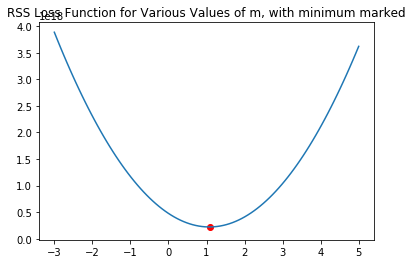

In [96]:
#Your code here
m = np.linspace(start=-3, stop=5, num=100)
rss_vals = [rss(m_val) for m_val in m]
plt.plot(m, rss_vals)
plt.title('RSS Loss Function for Various Values of m')
plt.scatter(m_new, rss(m_new), c='red')
plt.title('RSS Loss Function for Various Values of m, with minimum marked')

## Summary 

In this lab you coded up a gradient descent algorithm from scratch! In the next lab, you'll apply this to logistic regression in order to create a full implementation yourself!